(167, 10)
Numero de Paises do dataset:  167


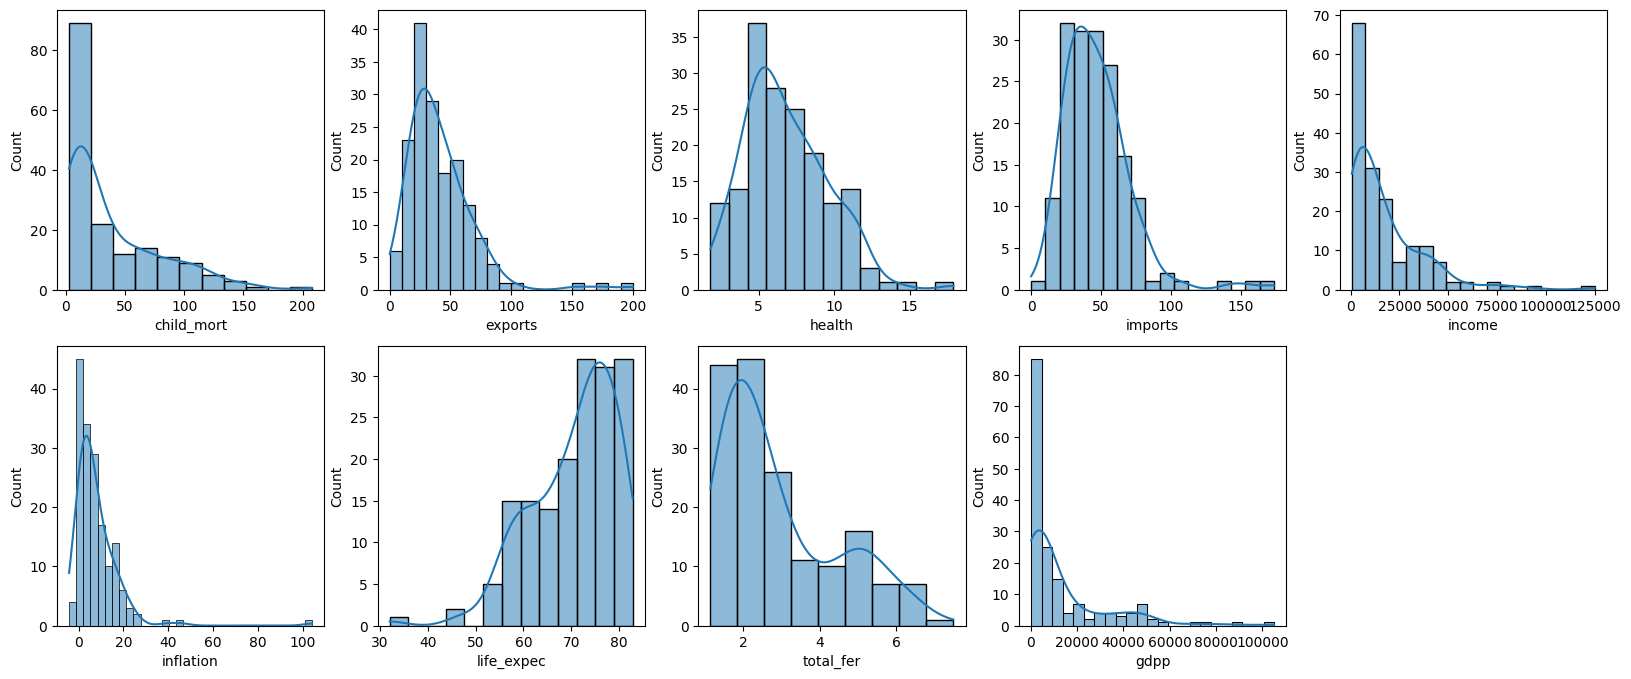

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 
import seaborn as sns

#PARTE 2.1
#Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. 
dataset = pd.read_csv('country-data.csv', sep=',', decimal='.')

print(dataset.shape)
#PARTE 2.2
#Quantos países existem no dataset?

print("Numero de Paises do dataset: ", dataset.shape[0])

#Remover a coluna de nome 
dataset.drop(dataset.columns[0], axis=1,inplace=True )

#PARTE 2.3
#Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização.
# Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

#Podemos observar que temos uma coluna de string referente ao nome do pais.
#Acredito que podemos desconsiderar a coluna de nome do pais. Pois ela so acaba servindo como se fosse um indice, nao acrescenta informacao. 
#Para os demais atributos, precisamos verificar se existem valores faltantes. 
#Tambem 'e interessante verificar se existem valores duplicados (para esse caso nao faz sentido ter linha duplicada para o mesmo pais)
#As outras 9 colunas todas precisam ser normalizadas pois estao com diferentes faixas de valores. Para que consiga inferir dados relevantes
#'e necessario  que todos estejam na mesma faixa de valores, para que nao exista distincao de pesos entre cada propriedade.\
 

plt.figure(figsize=(20, 8))

for index, value in enumerate(dataset.columns):
    plt.subplot(2, 5,index+1)
    sns.histplot(dataset[value], kde=True)




Dados faltantes:
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
Dados duplicados:
0
Verificando os tipos de cada atributo:
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


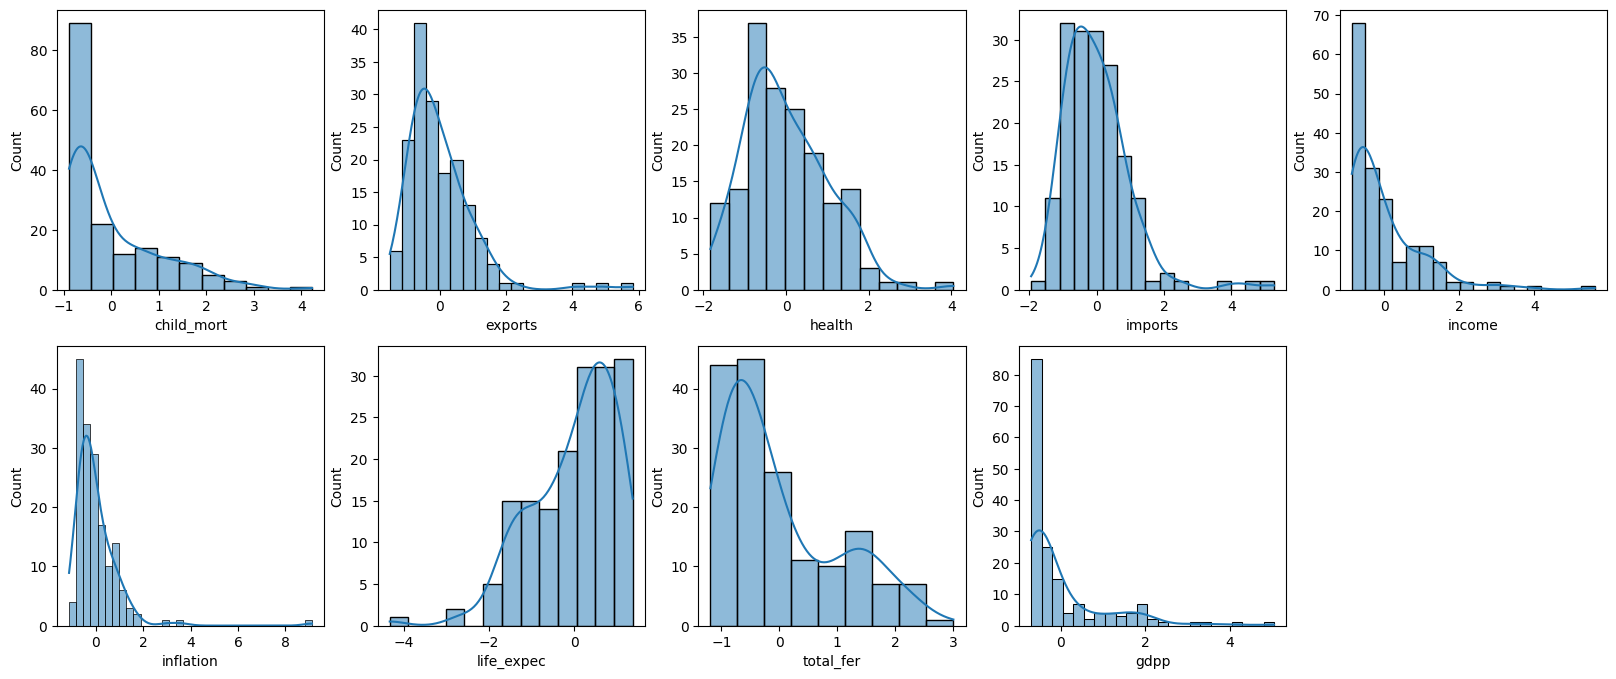

In [ ]:
#PARTE 2.4 
#Realize o pré-processamento adequado dos dados.

#Primeiro verificar se tem nulos
print("Dados faltantes:")
print(dataset.isna().sum())

#Depois verificar se tem duplicados
print("Dados duplicados:")
print(dataset.duplicated().sum())


print("Verificando os tipos de cada atributo:")
print(dataset.dtypes)
#Em seguida 'e necessario normalizar os dados para que todos os atributos fiquem na mesma faixa 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset)
dataset_transformed = scaler.transform(dataset)

dataframe_transformed  = pd.DataFrame(dataset_transformed)
#Plotando nova distribuicao
plt.figure(figsize=(20, 8))

for index, value in enumerate(dataset.columns):
    plt.subplot(2, 5,index+1)
    sns.histplot(dataframe_transformed[index], kde=True )
    plt.xlabel(dataset.columns[index])





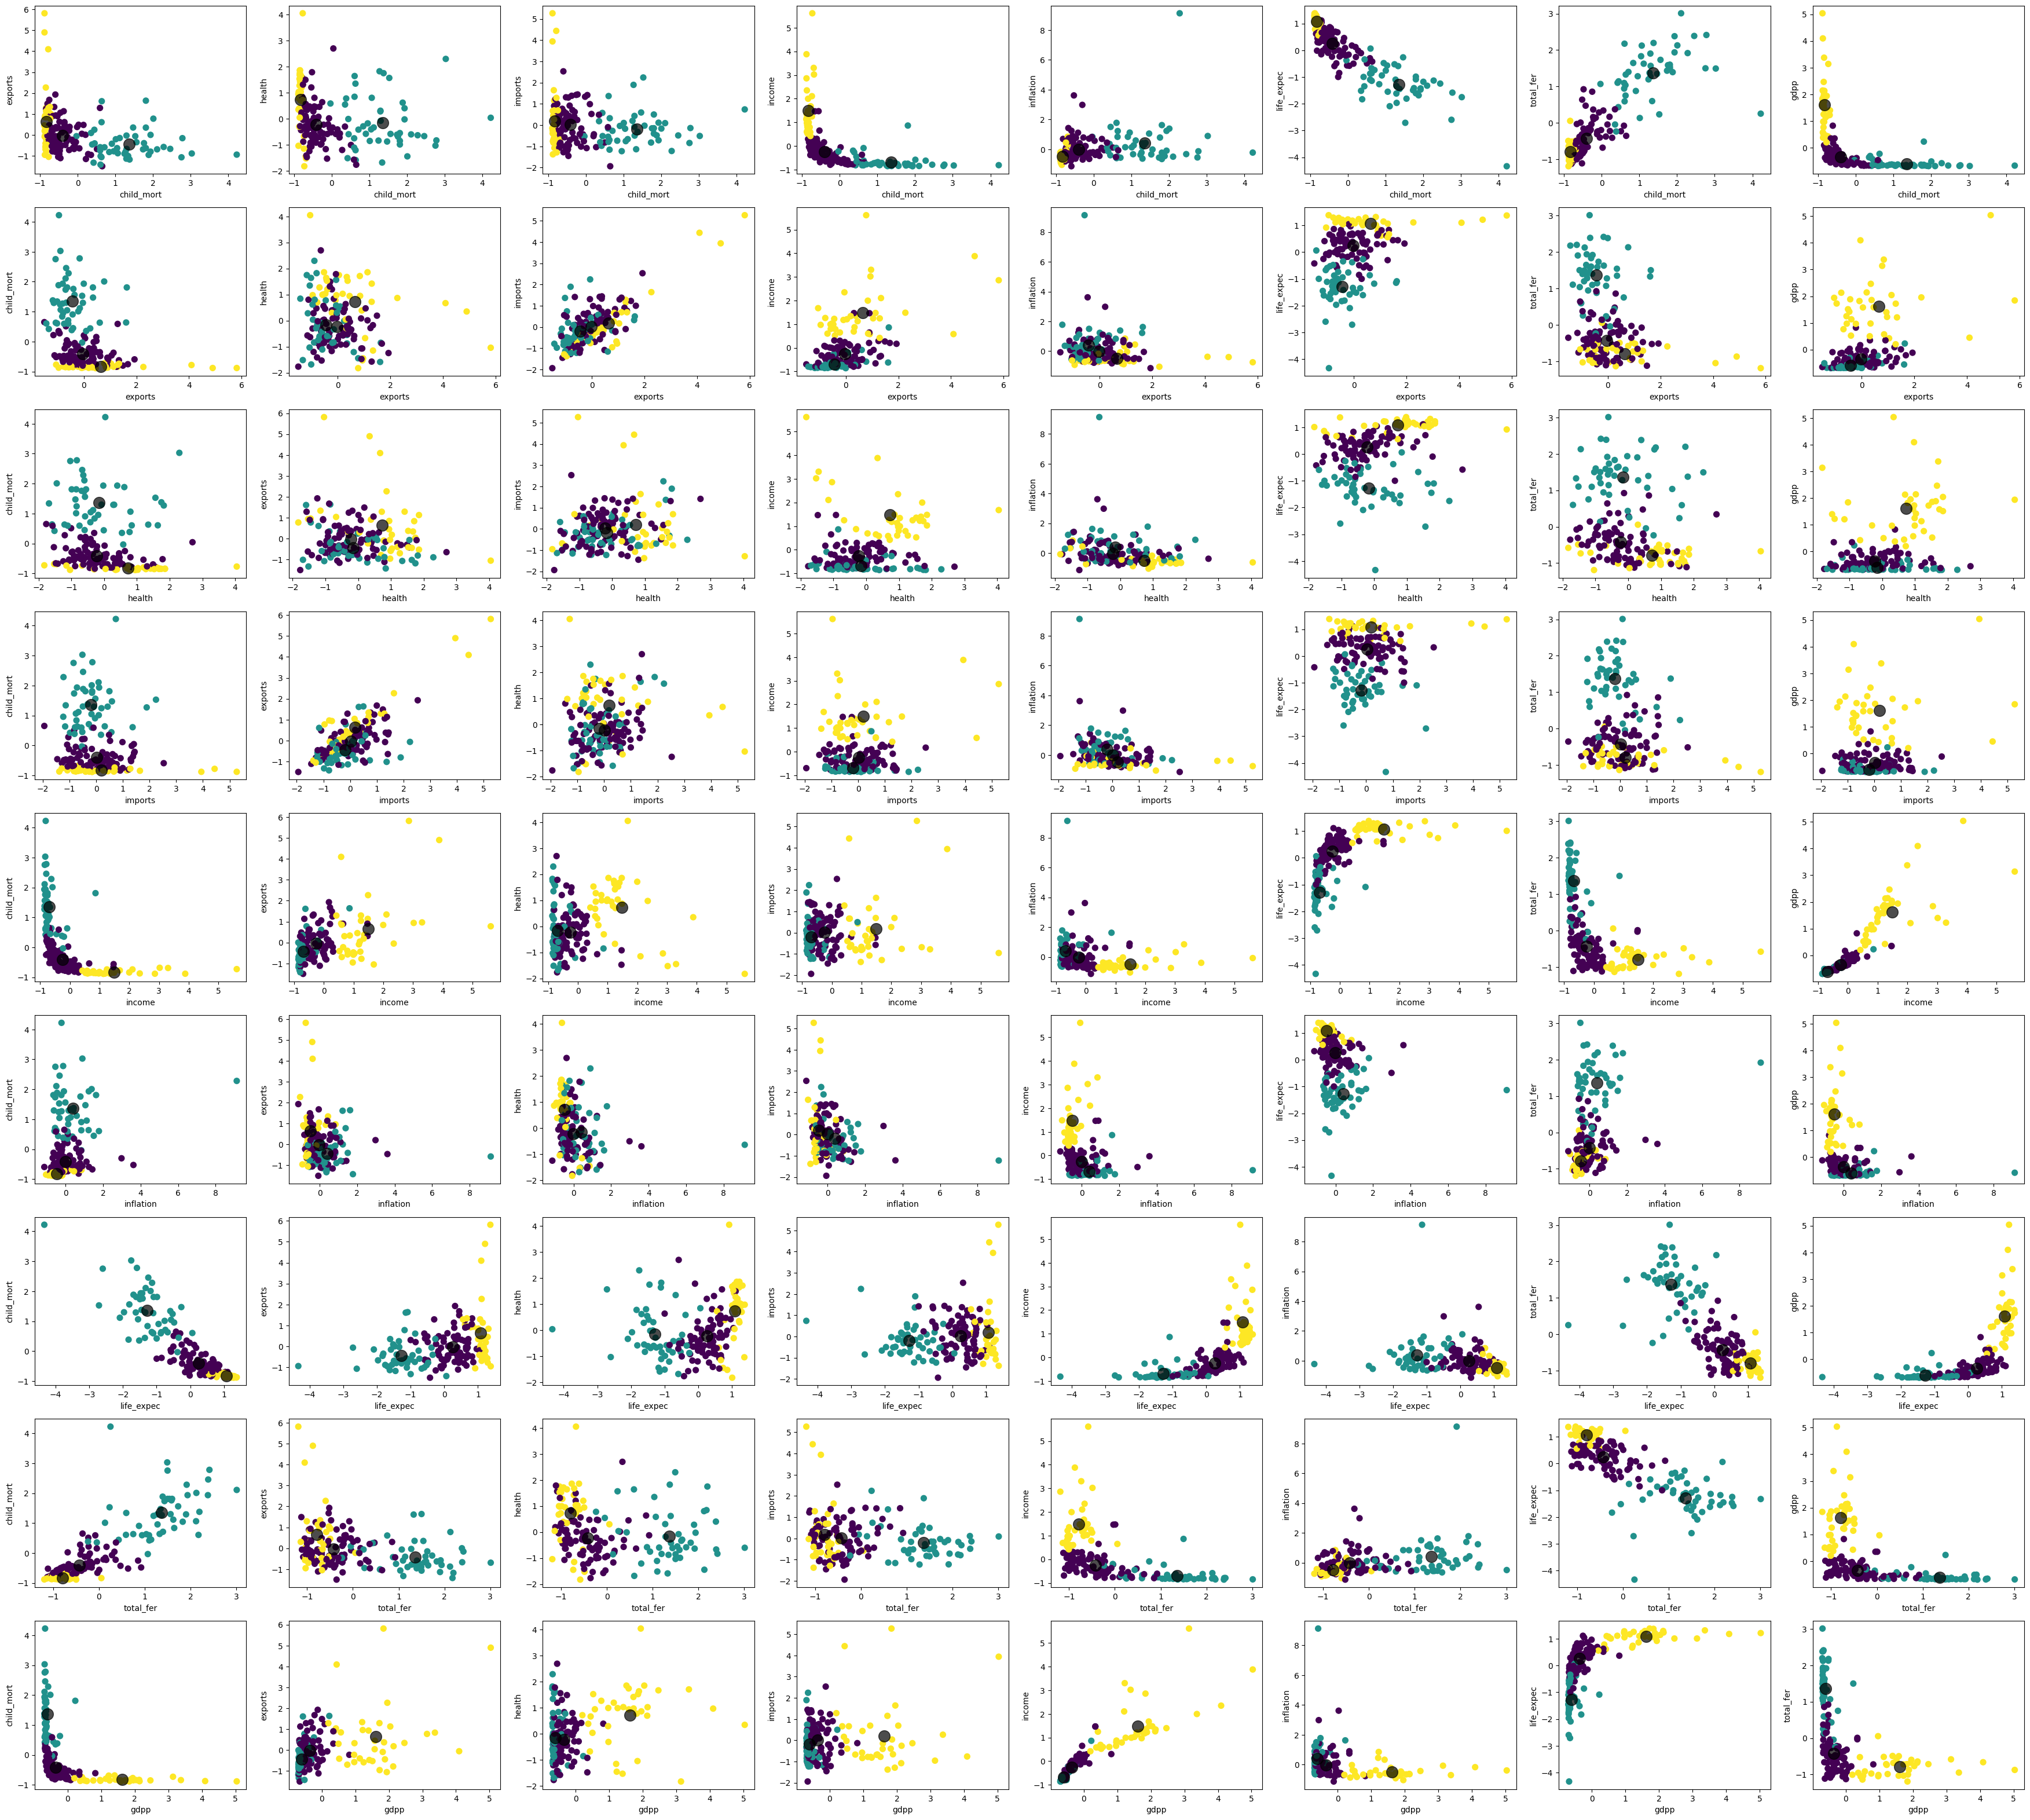

In [ ]:
#Parte 3.1.a
#Agrupamento em 3 grupos  usando K-MEDIAS
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=22)
kmeans.fit(dataset_transformed)
y_kmeans = kmeans.predict(dataset_transformed)
y_kmeans
centers = kmeans.cluster_centers_

plt.figure(figsize=(50, 40))
index=0
for col1 in dataframe_transformed.columns:
    for col2 in dataframe_transformed.columns:
        if col1 != col2:
            index+=1
            plt.subplot(9,9,index)
            plt.scatter(dataframe_transformed[col1], dataframe_transformed[col2], c=y_kmeans, s=50, cmap='viridis')
            plt.xlabel(dataset.columns[col1])
            plt.ylabel(dataset.columns[col2])
            plt.scatter(centers[:, col1], centers[:, col2], c='black', s=200, alpha=0.7)
    index+=1

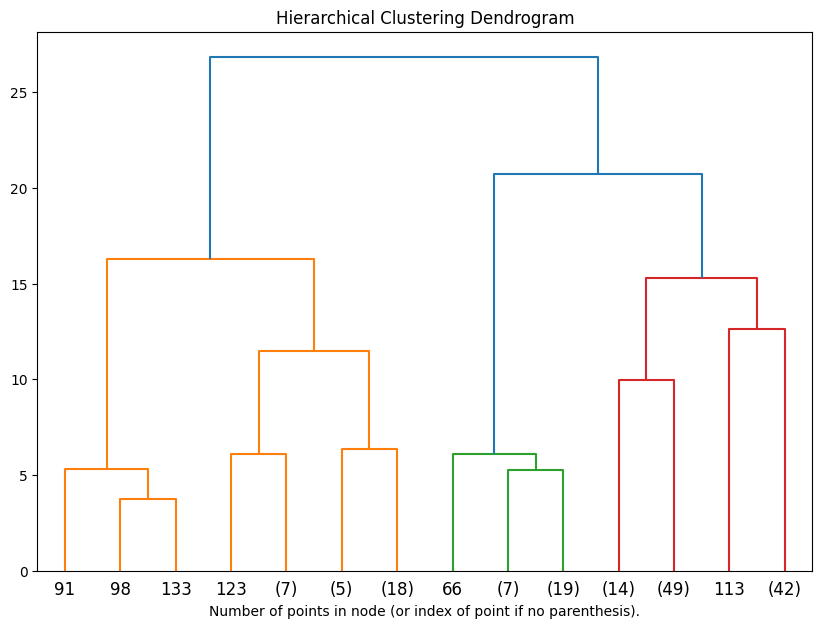

In [ ]:
#Parte 3.1.b
#Agrupamento em 3 grupos  usando Clusterizacao Hierarquica
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = cluster.fit(dataset_transformed)

plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

cluster_result = cluster.fit_predict(dataset_transformed)

plt.figure(figsize=(50, 40))
index=0
for col1 in dataframe_transformed.columns:
    for col2 in dataframe_transformed.columns:
        if col1 != col2:
            index+=1
            plt.subplot(9,9,index)
            plt.scatter(dataframe_transformed[col1], dataframe_transformed[col2], c=cluster.labels_, s=50, cmap='rainbow')
            plt.xlabel(dataset.columns[col1])
            plt.ylabel(dataset.columns[col2])            
    index+=1
